In [22]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iterations

A = np.array([[3, -0.1, -0.2],
[0.1, 7, -0.3],
[0.3, -0.2, 10]])

b = np.array([7.85, -19.3, 71.4])
x0 = np.zeros(3)
max_iterations = 1000
t1 = 10**-3 
t2 = 10**-6
t3 = 10**-9

In [23]:
jacobi_iterations = []
solution, iterations = jacobi(A, b, x0, t1, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
jacobi_iterations.append(iterations)
solution, iterations = jacobi(A, b, x0, t2, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
jacobi_iterations.append(iterations)
solution, iterations = jacobi(A, b, x0, t3, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
jacobi_iterations.append(iterations)

Jacobi Matrix A Solution: [ 3.0000225  -2.50000266  6.99998104]
Iterations: 3
Jacobi Matrix A Solution: [ 3.  -2.5  7. ]
Iterations: 6
Jacobi Matrix A Solution: [ 3.  -2.5  7. ]
Iterations: 8


In [24]:
gauss_seidel_iterations = []
solution, iterations = gauss_seidel(A, b, x0, t1, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
gauss_seidel_iterations.append(iterations)
solution, iterations = gauss_seidel(A, b, x0, t2, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
gauss_seidel_iterations.append(iterations)
solution, iterations = gauss_seidel(A, b, x0, t3, max_iterations)
print(f"Jacobi Matrix A Solution: {solution}")
print(f"Iterations: {iterations}")
gauss_seidel_iterations.append(iterations)

Jacobi Matrix A Solution: [ 3.00000035 -2.50000004  6.99999999]
Iterations: 3
Jacobi Matrix A Solution: [ 3.  -2.5  7. ]
Iterations: 4
Jacobi Matrix A Solution: [ 3.  -2.5  7. ]
Iterations: 6


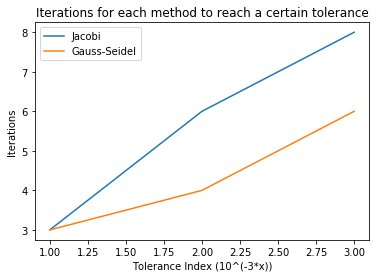

In [26]:
x = np.arange(1, len(jacobi_iterations) + 1)
plt.plot(x,jacobi_iterations)
plt.plot(x,gauss_seidel_iterations)
plt.xlabel("Tolerance Index (10^(-3*x))")
plt.ylabel("Iterations")
plt.title("Iterations for each method to reach a certain tolerance")
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

In [ ]:
#The Gauss-Seidel method always converged faster or as fast as the Jacobi method.
#In other words, the Gauss Seidel method needed equal or less iterates than the Jacobi method for the same tolerance.

#Decreasing the tolerances will increase the iterations needed by both methods.
#It is impossible to determine the trend  of lower tolerances will effect each one from just 3 data points.
#However, the amount of Jacobi iterations needed at lower tolerances will increase faster than the Gauss Seidel method.
#This is due to the spectral/effective radius of the Gauss Seidel method being smaller.